# Initialize the image


**Installing pakages**

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install thefuzz
!pip install super-image
!pip install gdown

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (2,911 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

**Import pakages**

In [ ]:
import cv2
import pytesseract
from PIL import Image as im
from PIL import ImageFilter
import numpy as np
from thefuzz import fuzz, process
from super_image import EdsrModel, ImageLoader
from google.colab.patches import cv2_imshow
import pandas as pd

**Download the images**

In [ ]:
!gdown --id '1ZCs3EogA0S0vV5d8ZsY2DX9NrAuiCeGp' --output ocr.png
!gdown --id '1FKCJ6ZMcdQh3cTzTaKMGSkqbaRaEx9Ke' --output nfact.jpg
!gdown --id '1YfiK_90t0kRYGE7_voqDRFUFE-ScMLEb' --output mcfact.png

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZCs3EogA0S0vV5d8ZsY2DX9NrAuiCeGp
To: /content/ocr.png
100% 81.5k/81.5k [00:00<00:00, 83.8MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FKCJ6ZMcdQh3cTzTaKMGSkqbaRaEx9Ke
To: /content/nfact.jpg
100% 189k/189k [00:00<00:00, 141MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YfiK

**Read images**

In [ ]:
#Read the images
ocr = im.open("ocr.png")
nfact = im.open("nfact.jpg")
mcfact = im.open("mcfact.png")

#Change dpi to 300
ocr.save("ocr-300.png", dpi=(300,300))
nfact.save("nfact-300.jpg", dpi=(300,300))
mcfact.save("mcfact-300.png", dpi=(300,300))

#Read changed dpi images
ocr300 = cv2.imread("ocr-300.png")
nfact300 = cv2.imread("nfact-300.jpg")
mcfact300 = cv2.imread("mcfact-300.png")


#image increase contrast/brightness
alpha = 1.5 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)
ocr_adjusted = cv2.convertScaleAbs(ocr300, alpha=alpha, beta=beta)
nfact_adjusted = cv2.convertScaleAbs(nfact300, alpha=alpha, beta=beta)
mcfact_adjusted = cv2.convertScaleAbs(mcfact300, alpha=alpha, beta=beta)

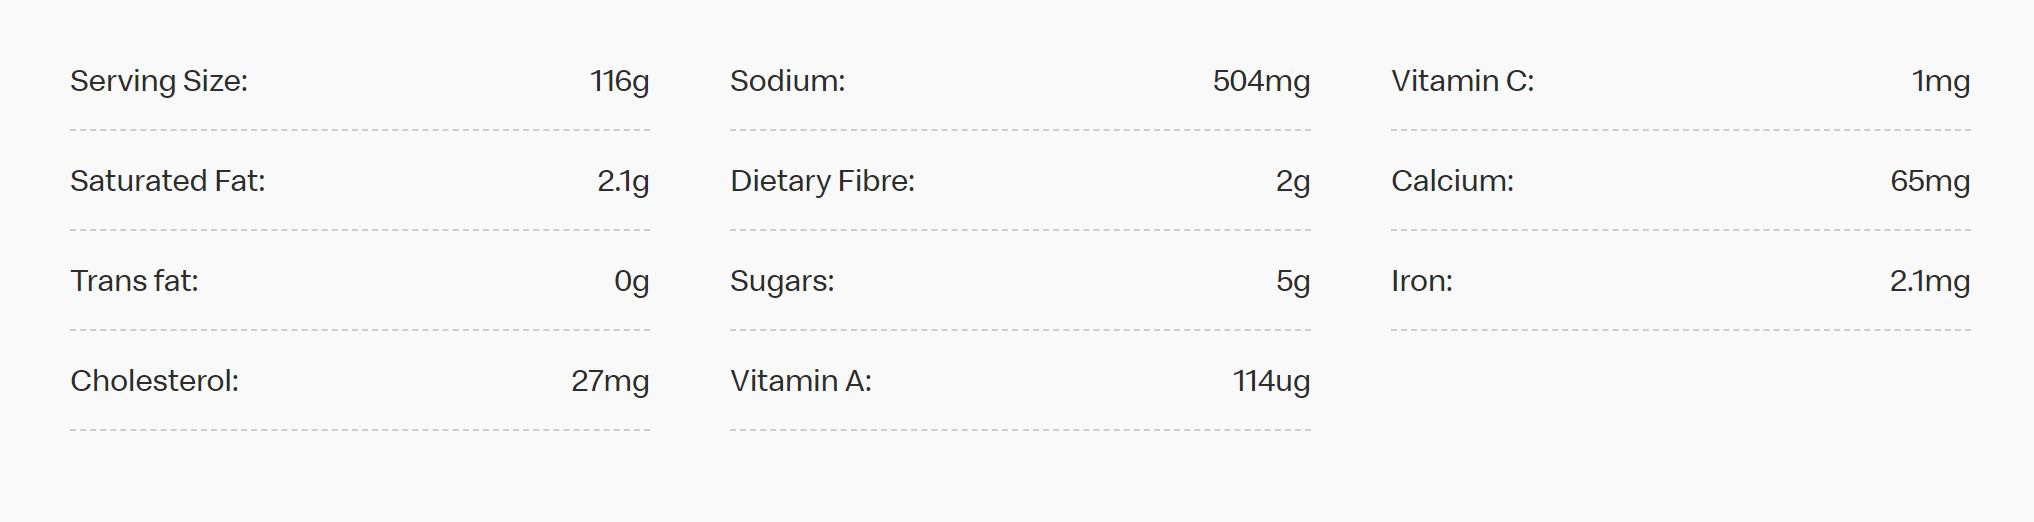

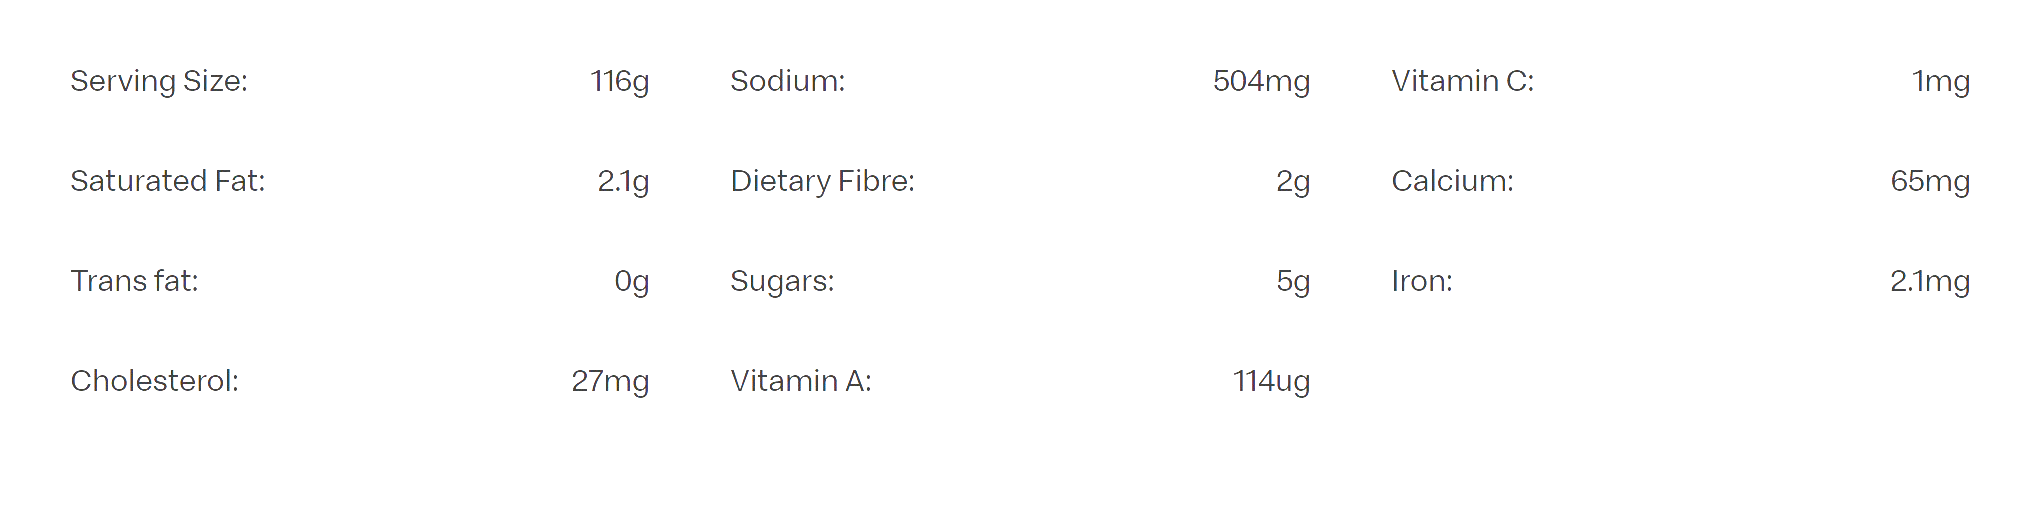

In [ ]:
cv2_imshow(mcfact300)
cv2_imshow(mcfact_adjusted)

In [ ]:
#convert the image from rgb to gray
ocr_gray = cv2.cvtColor(ocr_adjusted, cv2.COLOR_BGR2GRAY)
nfact_gray = cv2.cvtColor(nfact_adjusted, cv2.COLOR_BGR2GRAY)
mcfact_gray = cv2.cvtColor(mcfact_adjusted, cv2.COLOR_BGR2GRAY)

#convert the image from gray to black and white
ret,ocr_black = cv2.threshold(ocr_gray,100,255,cv2.THRESH_BINARY)
ret,nfact_black = cv2.threshold(nfact_gray,110,255,cv2.THRESH_BINARY)
ret,mcfact_black = cv2.threshold(mcfact_gray,127,255,cv2.THRESH_BINARY)

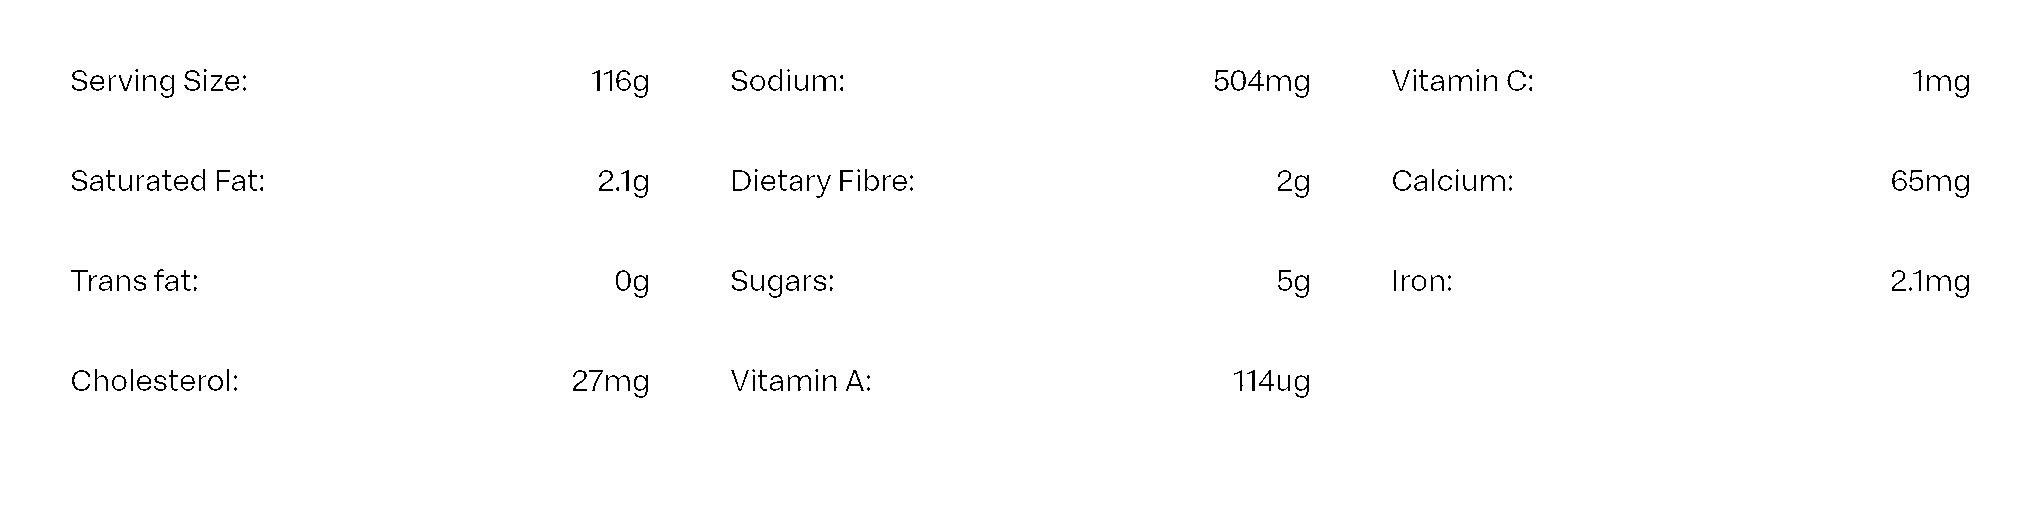

In [ ]:
cv2_imshow(mcfact_black)

**Image upscaling using deep learning**


In [ ]:
model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=2)
image = im.open("ocr-300.png")
inputs = ImageLoader.load_image(image)
preds = model(inputs)

ImageLoader.save_image(preds, './scaled_2x.png')
ImageLoader.save_compare(inputs, preds, './scaled_2x_compare.png')

**Convert image to text using tessetact pakage**


In [ ]:
ocr_text = pytesseract.image_to_string(ocr_black)
print(ocr_text)

nfact_text = pytesseract.image_to_string(nfact_black)
print(nfact_text)

mcfact_text = pytesseract.image_to_string(mcfact_black)
print(mcfact_text)

~

Serving Size: 1024 Sodium: 454mqy Vitamin C: Img

Saturated Fat: 3.99 Dietary Fibre: 2Yy Calciuny: 78MG
Trans fat: 0.2g Sugars: 5g Iron: 24mg

Cholesterol: 2imyg Vitamin A: 13ug

Nutrition Facts
Serving Size 3/4 Cup (27%;

With 1/2 Cup
Amount Per Serving Cereal Skim Mik

Calories 90 130

Calories from Fat 10 | 10
% Daily Value

 

 

 

Total Fat 1g* 2%
Saturated Fat 0g 0%
Trans Fat Og O%
Chole:sterol Om. O%
Sodium 190mg 8% 11%

 

 

 

 

 

Potassium 35mg 2% 8°5

Total Carbohydrate 23g 8% 10%
Dietary Fiber 5g 20%. 20%
Sugars 5g

 

 

 

 

Protein 2g

Vitamin A
Vitamir C
Calcium
Iron

 

 

 

Bll Baral
Dee Coes)

 

Serving Size: 116g Sodium: 504mg Vitamin C: Img

Saturated Fat: 2.1g Dietary Fibre: 2g Calcium: 65mg

Trans fat: Og Sugars: 5g Iron: 214mg

Cholesterol: 27mg Vitamin A: 14ug



**Create dictionary**

In [ ]:
#Split each text to seperate words
ocr_text_splited = ocr_text.split()
nfact_text_splited = nfact_text.split()
mcfact_text_splited = mcfact_text.split()

#Concatenate two image text to create dictionary
duplicat_dictionary = ocr_text_splited + mcfact_text_splited

#remove duplicate word from dictionary
dictionary = set(duplicat_dictionary)
dictionary = list(dictionary)

print(dictionary)

['13ug', 'Trans', 'Cholesterol:', '27mg', '454mqy', '3.99', 'Size:', 'Img', 'Vitamin', '2.1g', '2Yy', 'Calcium:', '65mg', '214mg', '5g', 'fat:', '1024', 'Dietary', 'Serving', '78MG', '0.2g', '116g', 'Sugars:', '2imyg', '504mg', '~', 'Og', 'Fibre:', 'Calciuny:', '2g', 'Iron:', 'Saturated', '14ug', 'Sodium:', '24mg', 'Fat:', 'C:', 'A:']


**Apply FuzzyWuzzy**

In [ ]:
Match = []
#If the matching precentage excede %70 it will replace the word
#Word length can be added as a condition
threshold = 0.7
for name_to_find in nfact_text_splited:
    resp_match =  process.extractOne(name_to_find ,dictionary)
    if resp_match[1] > threshold:
         #Create dictionary that contains each changed word
         row = {'sample_name':name_to_find,'actual_name':resp_match[0], 'score':resp_match[1]}
         Match.append(row)

results = pd.DataFrame(Match)
results

,sample_name,actual_name,score
0,Nutrition,Iron:,68
1,Facts,C:,90
2,Serving,Serving,100
3,Size,Size:,100
4,3/4,3.99,57
...,...,...,...
68,Iron,Iron:,100
69,Bll,Cholesterol:,30
70,Baral,A:,90
71,Dee,Dietary,60


It Needs good ocr or good conditions and dictionary to preform well using FuzzyWuzzy